<a href="https://colab.research.google.com/github/adithya36/Used_Cars_Price_Prediction/blob/main/modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TL_modelling/final_data.csv')

In [7]:
df.head()

,Unnamed: 0,Index,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,0,0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,1,1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,2,2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,3,3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,4,4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [8]:
df = df.drop(['Unnamed: 0', 'Index'], axis=1)
df.columns

Index(['Manufacturer_name', 'Gear', 'Odometer (km)', 'year', 'Fuel',
       'Price ($)', 'Country'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407552 entries, 0 to 407551
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Manufacturer_name  407552 non-null  object 
 1   Gear               407552 non-null  object 
 2   Odometer (km)      407552 non-null  float64
 3   year               407552 non-null  int64  
 4   Fuel               407552 non-null  object 
 5   Price ($)          407552 non-null  float64
 6   Country            407552 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 21.8+ MB


In [10]:
(df.Manufacturer_name.value_counts())

ford            61951
chevrolet       42984
toyota          31278
honda           20498
nissan          17141
                ...  
fisker              1
mercedes-amg        1
9ff                 1
zhidou              1
brilliance          1
Name: Manufacturer_name, Length: 107, dtype: int64

In [11]:
(df.Gear.value_counts())

automatic         281242
manual             68617
other              57639
semi-automatic        54
Name: Gear, dtype: int64

In [12]:
(df.Fuel.value_counts())

gas         284380
diesel       45672
gasoline     35142
other        25109
petrol        9517
hybrid        5674
electric      2055
ethanol          2
hydrogen         1
Name: Fuel, dtype: int64

In [13]:
(df.Country.value_counts())

US         332279
Germany     43944
India       19479
Belarus     11850
Name: Country, dtype: int64

In [14]:
df.Fuel.replace({"hydrogen": "other", "ethanol": "other"}, inplace=True)
(df.Fuel.value_counts())

gas         284380
diesel       45672
gasoline     35142
other        25112
petrol        9517
hybrid        5674
electric      2055
Name: Fuel, dtype: int64

In [15]:
df.head()

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


In [16]:
df.Manufacturer_name.value_counts()[60:]

chery             31
geely             26
aston             25
land rover        23
mg                20
bentley           19
iveco             19
others            16
ferrari           16
ds                16
great wall        13
maserati          13
saab              13
isuzu             12
microcar          12
aston-martin      11
mclaren           11
lamborghini       10
daihatsu          10
alpina            10
lifan              9
газ                6
заз                6
уаз                6
ligier             5
force              5
ambassador         4
rolls-royce        4
morgan             4
polestar           4
alpine             4
corvette           3
opelcorsa          3
maybach            3
aixam              3
piaggio            3
baic               3
dc                 2
premier            2
estrima            2
dfsk               2
caravans-wohnm     2
fisker             1
mercedes-amg       1
9ff                1
zhidou             1
brilliance         1
Name: Manufac

In [17]:
df.describe()

,Odometer (km),year,Price ($)
count,4.075520e+05,407552.000000,4.075520e+05
mean,1.401383e+05,2012.661862,1.798468e+04
std,9.951946e+04,5.528372,1.430996e+04
min,0.000000e+00,1982.000000,1.000000e+03
25%,5.475000e+04,2010.000000,7.499000e+03
50%,1.271057e+05,2014.000000,1.445000e+04
75%,2.092142e+05,2017.000000,2.599500e+04
max,3.800000e+06,2022.000000,1.415882e+06


In [18]:
df.loc[df['Odometer (km)']==0].Country.value_counts()

US         587
Germany     63
Belarus      6
Name: Country, dtype: int64

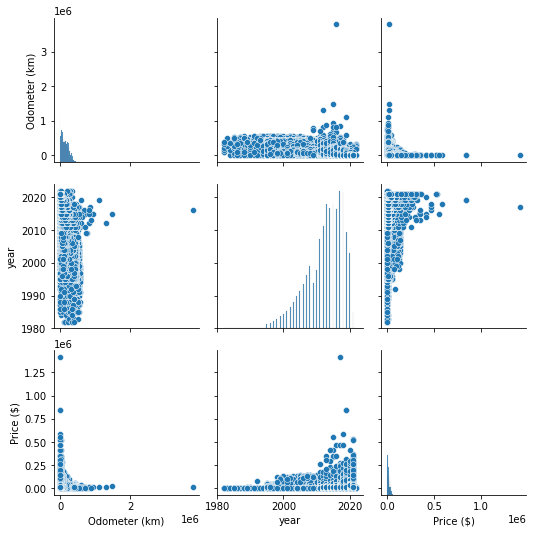

In [28]:
sns.pairplot(df)

In [19]:
df.isnull().sum()

Manufacturer_name    0
Gear                 0
Odometer (km)        0
year                 0
Fuel                 0
Price ($)            0
Country              0
dtype: int64

In [20]:
df.head()

,Manufacturer_name,Gear,Odometer (km),year,Fuel,Price ($),Country
0,subaru,manual,280000.0,2003,gasoline,6900.0,Belarus
1,subaru,manual,321000.0,2002,gasoline,4300.0,Belarus
2,subaru,manual,191000.0,2005,gasoline,10950.0,Belarus
3,subaru,automatic,417000.0,1997,gasoline,1850.0,Belarus
4,subaru,manual,340000.0,1993,gasoline,2000.0,Belarus


# With Manufacturer_name feature

In [21]:
f_df_1 = df[['year', 'Price ($)', 'Odometer (km)', 'Gear', 'Fuel', 'Country', 'Manufacturer_name']]

In [22]:
f_df_1['no_year'] = 2021 - f_df_1['year']
f_df_1.drop(['year'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
f_df_1.shape

(407552, 7)

In [24]:
f_df_1 = pd.get_dummies(f_df_1, drop_first=True)

In [25]:
f_df_1.head()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US,Manufacturer_name_abarth,Manufacturer_name_acura,Manufacturer_name_aixam,Manufacturer_name_alfa,Manufacturer_name_alfa romeo,Manufacturer_name_alfa-romeo,Manufacturer_name_alpina,Manufacturer_name_alpine,Manufacturer_name_ambassador,Manufacturer_name_aston,Manufacturer_name_aston-martin,Manufacturer_name_audi,Manufacturer_name_baic,Manufacturer_name_bentley,Manufacturer_name_bmw,Manufacturer_name_brilliance,Manufacturer_name_buick,Manufacturer_name_cadillac,Manufacturer_name_caravans-wohnm,Manufacturer_name_chery,Manufacturer_name_chevrolet,Manufacturer_name_chrysler,Manufacturer_name_citroen,Manufacturer_name_corvette,Manufacturer_name_cupra,...,Manufacturer_name_mercedes-amg,Manufacturer_name_mercedes-benz,Manufacturer_name_mercury,Manufacturer_name_mg,Manufacturer_name_microcar,Manufacturer_name_mini,Manufacturer_name_mitsubishi,Manufacturer_name_morgan,Manufacturer_name_nissan,Manufacturer_name_opel,Manufacturer_name_opelcorsa,Manufacturer_name_others,Manufacturer_name_peugeot,Manufacturer_name_piaggio,Manufacturer_name_polestar,Manufacturer_name_pontiac,Manufacturer_name_porsche,Manufacturer_name_premier,Manufacturer_name_ram,Manufacturer_name_renault,Manufacturer_name_rolls-royce,Manufacturer_name_rover,Manufacturer_name_saab,Manufacturer_name_saturn,Manufacturer_name_seat,Manufacturer_name_skoda,Manufacturer_name_smart,Manufacturer_name_ssangyong,Manufacturer_name_subaru,Manufacturer_name_suzuki,Manufacturer_name_tata,Manufacturer_name_tesla,Manufacturer_name_toyota,Manufacturer_name_volkswagen,Manufacturer_name_volvo,Manufacturer_name_zhidou,Manufacturer_name_ваз,Manufacturer_name_газ,Manufacturer_name_заз,Manufacturer_name_уаз
0,6900.0,280000.0,18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,4300.0,321000.0,19,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,10950.0,191000.0,16,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1850.0,417000.0,24,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2000.0,340000.0,28,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
f_df_1.corr()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US,Manufacturer_name_abarth,Manufacturer_name_acura,Manufacturer_name_aixam,Manufacturer_name_alfa,Manufacturer_name_alfa romeo,Manufacturer_name_alfa-romeo,Manufacturer_name_alpina,Manufacturer_name_alpine,Manufacturer_name_ambassador,Manufacturer_name_aston,Manufacturer_name_aston-martin,Manufacturer_name_audi,Manufacturer_name_baic,Manufacturer_name_bentley,Manufacturer_name_bmw,Manufacturer_name_brilliance,Manufacturer_name_buick,Manufacturer_name_cadillac,Manufacturer_name_caravans-wohnm,Manufacturer_name_chery,Manufacturer_name_chevrolet,Manufacturer_name_chrysler,Manufacturer_name_citroen,Manufacturer_name_corvette,Manufacturer_name_cupra,...,Manufacturer_name_mercedes-amg,Manufacturer_name_mercedes-benz,Manufacturer_name_mercury,Manufacturer_name_mg,Manufacturer_name_microcar,Manufacturer_name_mini,Manufacturer_name_mitsubishi,Manufacturer_name_morgan,Manufacturer_name_nissan,Manufacturer_name_opel,Manufacturer_name_opelcorsa,Manufacturer_name_others,Manufacturer_name_peugeot,Manufacturer_name_piaggio,Manufacturer_name_polestar,Manufacturer_name_pontiac,Manufacturer_name_porsche,Manufacturer_name_premier,Manufacturer_name_ram,Manufacturer_name_renault,Manufacturer_name_rolls-royce,Manufacturer_name_rover,Manufacturer_name_saab,Manufacturer_name_saturn,Manufacturer_name_seat,Manufacturer_name_skoda,Manufacturer_name_smart,Manufacturer_name_ssangyong,Manufacturer_name_subaru,Manufacturer_name_suzuki,Manufacturer_name_tata,Manufacturer_name_tesla,Manufacturer_name_toyota,Manufacturer_name_volkswagen,Manufacturer_name_volvo,Manufacturer_name_zhidou,Manufacturer_name_ваз,Manufacturer_name_газ,Manufacturer_name_заз,Manufacturer_name_уаз
Price ($),1.000000,-0.460581,-0.534409,-0.221902,0.301542,-0.006518,0.042377,-0.095165,-0.065997,0.012454,0.166049,-0.087360,0.038152,-0.099724,0.091214,0.003759,0.027622,0.000173,0.009587,-0.012753,0.037116,0.020752,0.012978,0.003335,0.095717,0.003576,0.089780,0.000526,0.078210,0.053774,-0.001775,-0.017099,0.024416,0.000224,-0.008860,0.030125,-0.056862,-0.042736,0.021236,0.026612,...,0.005847,0.067647,-0.043368,0.003234,-0.003426,-0.016380,-0.027417,0.004218,-0.074159,-0.060518,-0.003007,-0.003655,-0.046311,-0.001800,0.012635,-0.054391,0.097717,-0.002231,0.149589,-0.055804,0.034275,0.034952,-0.005976,-0.044093,-0.017898,-0.021387,-0.027407,-0.003017,-0.040972,-0.016913,-0.017929,0.061677,-0.018999,-0.043157,0.024176,-0.000354,-0.009479,-0.003560,-0.003911,-0.003307
Odometer (km),-0.460581,1.000000,0.681548,-0.095976,-0.354099,-0.006430,-0.065510,0.197211,-0.148434,-0.021797,-0.146533,-0.147375,-0.237051,-0.184240,0.212368,-0.011219,-0.025213,-0.003810,-0.012115,0.014698,-0.045755,-0.004717,-0.003974,-0.001925,-0.010122,-0.005529,-0.052105,-0.003340,-0.008184,-0.039475,-0.000624,-0.015631,-0.016778,-0.001044,-0.000769,0.058841,0.026674,0.007743,-0.003375,-0.016820,...,-0.001828,-0.023874,0.031356,-0.009049,-0.005937,-0.028639,-0.017812,-0.003998,0.014227,-0.030272,-0.001730,-0.007690,0.004275,-0.002931,-0.004348,0.047855,-0.015586,-0.001995,0.030164,-0.041532,-0.003402,-0.006263,0.010832,0.029860,-0.041370,-0.054545,-0.042729,-0.002867,0.024660,-0.018790,-0.036682,-0.034638,0.069500,-0.052610,-0.012255,-0.002159,-0.002038,0.003079,-0.001873,-0.002435
no_year,-0.534409,0.681548,1.000000,0.057609,-0.302765,-0.001707,-0.052272,0.129742,-0.035167,-0.040875,-0.154690,-0.048687,-0.205500,-0.075169,0.083784,-0.009925,-0.026671,-0.002947,-0.009500,0.028062,-0.043064,-0.003618,-0.004158,0.003209,-0.008356,0.003014,-0.041160,-0.002620,-0.004448,-0.010062,0.000471,-0.002810,-0.006499,-0.001538,0.004199,0.035109,0.030094,0.025492,-0.002620,-0.017647,...,-0.001229,0.010317,0.065773,-0.008475,-0.001886,-0.009593,-0.007026,0.002358,-0.009698,-0.009359,0.003760,-0.004492,0.029080,-0.000330,-0.004583,0.080432,0.010817,0.000265

In [29]:
X1 = f_df_1.iloc[:,1:]
y1 = f_df_1.iloc[:,0]

In [31]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

##LinearRegression

In [39]:
scaler = StandardScaler()
scal_X1_train = pd.DataFrame(scaler.fit_transform(X1_train), columns = X1_train.columns)
scal_X1_test = pd.DataFrame(scaler.fit_transform(X1_test), columns = X1_test.columns)

In [40]:
lr = LinearRegression()
lr.fit(scal_X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
pd.DataFrame(lr.coef_, X1.columns, columns = ['Coeff'])

,Coeff
Odometer (km),-3861.081697
no_year,-5217.964808
Gear_manual,-1698.241320
Gear_other,830.116998
Gear_semi-automatic,-34.536865
...,...
Manufacturer_name_zhidou,9.361902
Manufacturer_name_ваз,42.723867
Manufacturer_name_газ,11.153383
Manufacturer_name_заз,-6.722018


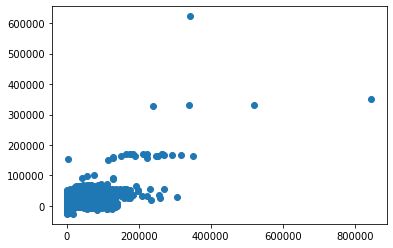

In [42]:
predictions = lr.predict(scal_X1_test)

plt.scatter(y1_test, predictions)

(array([1.0000e+00, 1.0000e+00, 7.0000e+00, 1.2166e+05, 5.1800e+02,
        7.0000e+01, 7.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-279910.88364496, -202242.97670789, -124575.06977082,
         -46907.16283374,   30760.74410333,  108428.6510404 ,
         186096.55797747,  263764.46491454,  341432.37185162,
         419100.27878869,  496768.18572576]),
 <a list of 10 Patch objects>)

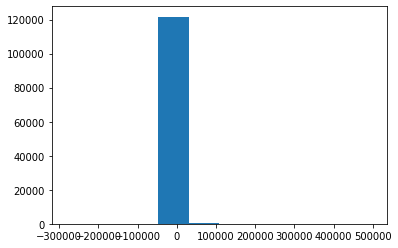

In [43]:
plt.hist(y1_test - predictions)

In [46]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, lr.predict(scal_X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, lr.predict(scal_X1_test))))

RMSE on train: 9678.754281402009
RMSE on test: 9260.91009719841


In [47]:
print('r2_score on train:', r2_score(y1_train, lr.predict(scal_X1_train)))
print('r2_score on test:', r2_score(y1_test, lr.predict(scal_X1_test)))

r2_score on train: 0.5467357416950491
r2_score on test: 0.5719060910820014


##DecisionTreeRegressor

In [61]:
dt = DecisionTreeRegressor()
dt.fit(X1_train, y1_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
dt_test_predictions = dt.predict(X1_test)

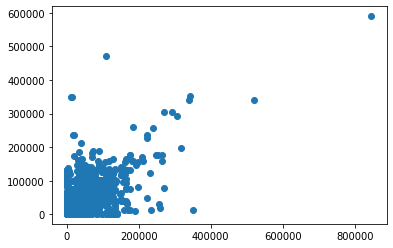

In [63]:
plt.scatter(y1_test,dt_test_predictions)

(array([3.00000e+00, 0.00000e+00, 4.00000e+00, 5.50000e+01, 4.09800e+03,
        1.17988e+05, 9.10000e+01, 2.20000e+01, 4.00000e+00, 1.00000e+00]),
 array([-361800. , -291881.4, -221962.8, -152044.2,  -82125.6,  -12207. ,
          57711.6,  127630.2,  197548.8,  267467.4,  337386. ]),
 <a list of 10 Patch objects>)

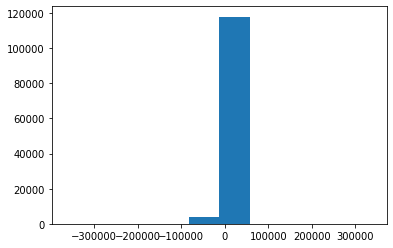

In [64]:
plt.hist(y1_test-dt_test_predictions)

In [65]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, dt.predict(X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, dt.predict(X1_test))))

RMSE on train: 1937.9328120544178
RMSE on test: 7914.022080451983


In [66]:
print('r2_score on train:', r2_score(y1_train, dt.predict(X1_train)))
print('r2_score on test:', r2_score(y1_test, dt.predict(X1_test)))

r2_score on train: 0.9818285334973706
r2_score on test: 0.6873731840289403


##ExtraTreesRegressor

In [81]:
et = ExtraTreesRegressor(random_state=1)
et.fit(X1_train, y1_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=1, verbose=0, warm_start=False)

In [82]:
et_test_predictions = et.predict(X1_test)

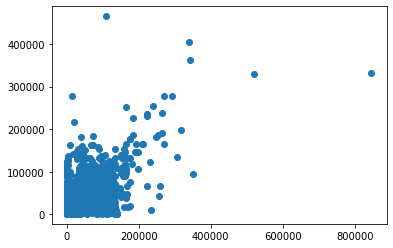

In [83]:
plt.scatter(y1_test,et_test_predictions)

(array([1.0000e+00, 2.0000e+00, 3.1000e+01, 7.6280e+03, 1.1454e+05,
        5.7000e+01, 5.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-354875.52 , -267890.128, -180904.736,  -93919.344,   -6933.952,
          80051.44 ,  167036.832,  254022.224,  341007.616,  427993.008,
         514978.4  ]),
 <a list of 10 Patch objects>)

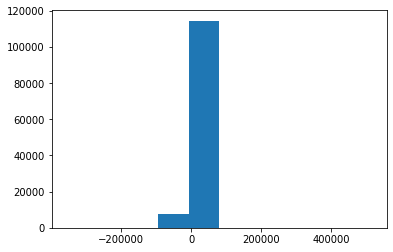

In [84]:
plt.hist(y1_test-et_test_predictions)

In [85]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, et.predict(X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, et.predict(X1_test))))

RMSE on train: 1937.9668819593319
RMSE on test: 7173.915645496248


In [86]:
print('r2_score on train:', r2_score(y1_train, et.predict(X1_train)))
print('r2_score on test:', r2_score(y1_test, et.predict(X1_test)))

r2_score on train: 0.9818278945633745
r2_score on test: 0.7431117479777452


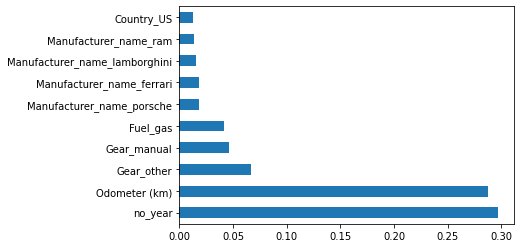

In [73]:
feat_importances = pd.Series(et.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##RandomForestRegressor

In [74]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X1_train, y1_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [75]:
rf_test_predictions=rf.predict(X1_test)

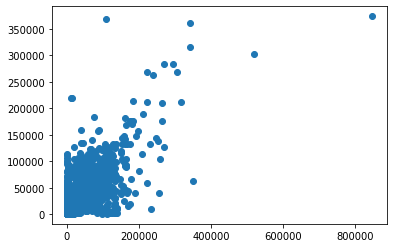

In [76]:
plt.scatter(y1_test,rf_test_predictions)

(array([3.00000e+00, 1.00000e+00, 1.43000e+02, 1.21861e+05, 2.17000e+02,
        3.60000e+01, 3.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-258221.99333333, -185142.397     , -112062.80066667,
         -38983.20433333,   34096.392     ,  107175.98833333,
         180255.58466667,  253335.181     ,  326414.77733333,
         399494.37366667,  472573.97      ]),
 <a list of 10 Patch objects>)

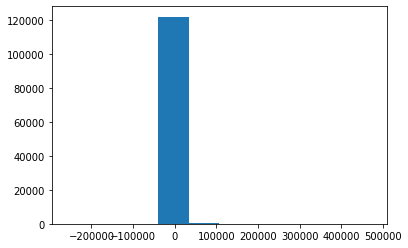

In [77]:
#sns.distplot(y1_test-predictions)
plt.hist(y1_test-rf_test_predictions)

In [78]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, rf.predict(X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, rf.predict(X1_test))))

RMSE on train: 3166.3386451700376
RMSE on test: 6763.11454784487


In [79]:
print('r2_score on train:', r2_score(y1_train, rf.predict(X1_train)))
print('r2_score on test:', r2_score(y1_test, rf.predict(X1_test)))

r2_score on train: 0.9514904474374568
r2_score on test: 0.7716898609326546


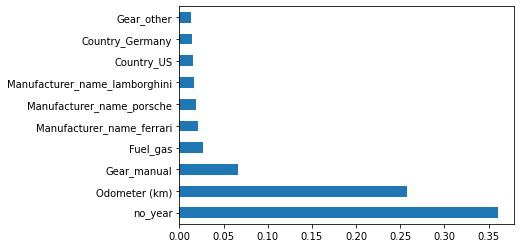

In [80]:
feat_importances = pd.Series(rf.feature_importances_, index=X1.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##GradientBoostingRegressor

In [87]:
gb = GradientBoostingRegressor(random_state=1)
gb.fit(X1_train, y1_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
gb_test_predictions = gb.predict(X1_test)

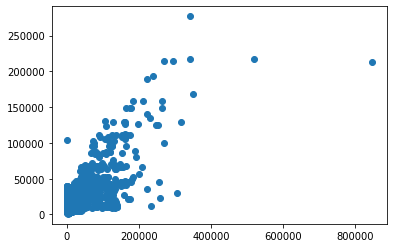

In [89]:
plt.scatter(y1_test,gb_test_predictions)

(array([4.5000e+01, 1.2196e+05, 2.2300e+02, 3.2000e+01, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-101988.72195592,  -28541.92202223,   44904.87791147,
         118351.67784516,  191798.47777885,  265245.27771254,
         338692.07764623,  412138.87757993,  485585.67751362,
         559032.47744731,  632479.277381  ]),
 <a list of 10 Patch objects>)

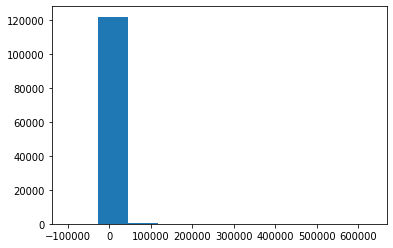

In [90]:
plt.hist(y1_test-gb_test_predictions)

In [91]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, gb.predict(X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, gb.predict(X1_test))))

RMSE on train: 8847.477356014742
RMSE on test: 8811.177954575596


In [92]:
print('r2_score on train:', r2_score(y1_train, gb.predict(X1_train)))
print('r2_score on test:', r2_score(y1_test, gb.predict(X1_test)))

r2_score on train: 0.6212510257136887
r2_score on test: 0.6124750603777342


##Hyper-parameter tuning for Random Forest

In [94]:
# Number of trees in random forest
#n_estimators = [20,60,100,120] #[int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [2,8,None] #[int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5]

In [95]:
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [2, 8, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}


In [96]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [97]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=5, random_state=42, n_jobs = None)

In [98]:
rf_random.fit(X1_train,y1_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, score=0.502, total= 1.9min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.9min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, score=0.560, total= 1.8min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.7min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, score=0.558, total= 1.9min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.6min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, score=0.519, total= 1.9min
[CV] min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  7.5min remaining:    0.0s


[CV]  min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=8, score=0.576, total= 1.9min
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.679, total=  53.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.743, total=  54.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.741, total=  54.6s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, score=0.749, total=  53.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None 
[CV]  min_samples_split=5, min_samples_leaf=2, max_fe

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 45.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [106]:
rf_random.best_score_

0.7357321032802433

In [107]:
predictions=rf_random.predict(X1_test)

(array([1.09198e+05, 1.29960e+04, 6.40000e+01, 7.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-74658.0685161 ,   5085.79599722,  84829.66051054, 164573.52502386,
        244317.38953719, 324061.25405051, 403805.11856383, 483548.98307715,
        563292.84759047, 643036.71210379, 722780.57661711]),
 <a list of 10 Patch objects>)

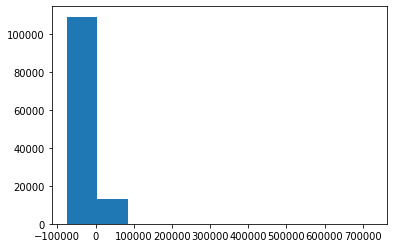

In [111]:
plt.hist(y1_test-predictions)

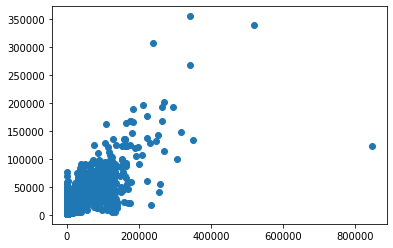

In [112]:
plt.scatter(y1_test,predictions)

In [113]:
print('RMSE on train:', np.sqrt(metrics.mean_squared_error(y1_train, rf_random.predict(X1_train))))
print('RMSE on test:', np.sqrt(metrics.mean_squared_error(y1_test, rf_random.predict(X1_test))))

RMSE on train: 5807.470010966082
RMSE on test: 6781.519281261701


In [114]:
print('r2_score on train:', r2_score(y1_train, rf_random.predict(X1_train)))
print('r2_score on test:', r2_score(y1_test, rf_random.predict(X1_test)))

r2_score on train: 0.8368126471828595
r2_score on test: 0.7704455511597276


---

# W/O Manufacturer_name feature

In [32]:
f_df = df[['year', 'Price ($)', 'Odometer (km)', 'Gear', 'Fuel', 'Country']]

In [33]:
f_df['no_year'] = 2021 - f_df['year']
f_df.drop(['year'],axis=1,inplace=True)

In [34]:
f_df.shape

(407552, 6)

In [35]:
f_df = pd.get_dummies(f_df, drop_first=True)

In [36]:
f_df.head()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US
0,6900.0,280000.0,18,1,0,0,0,0,1,0,0,0,0,0,0
1,4300.0,321000.0,19,1,0,0,0,0,1,0,0,0,0,0,0
2,10950.0,191000.0,16,1,0,0,0,0,1,0,0,0,0,0,0
3,1850.0,417000.0,24,0,0,0,0,0,1,0,0,0,0,0,0
4,2000.0,340000.0,28,1,0,0,0,0,1,0,0,0,0,0,0


In [37]:
f_df.corr()

,Price ($),Odometer (km),no_year,Gear_manual,Gear_other,Gear_semi-automatic,Fuel_electric,Fuel_gas,Fuel_gasoline,Fuel_hybrid,Fuel_other,Fuel_petrol,Country_Germany,Country_India,Country_US
Price ($),1.000000,-0.460581,-0.534409,-0.221902,0.301542,-0.006518,0.042377,-0.095165,-0.065997,0.012454,0.166049,-0.087360,0.038152,-0.099724,0.091214
Odometer (km),-0.460581,1.000000,0.681548,-0.095976,-0.354099,-0.006430,-0.065510,0.197211,-0.148434,-0.021797,-0.146533,-0.147375,-0.237051,-0.184240,0.212368
no_year,-0.534409,0.681548,1.000000,0.057609,-0.302765,-0.001707,-0.052272,0.129742,-0.035167,-0.040875,-0.154690,-0.048687,-0.205500,-0.075169,0.083784
Gear_manual,-0.221902,-0.095976,0.057609,1.000000,-0.182615,-0.005180,-0.030179,-0.480570,0.478038,-0.033596,-0.107988,0.265939,0.450541,0.378792,-0.692328
Gear_other,0.301542,-0.354099,-0.302765,-0.182615,1.000000,-0.004672,0.046860,-0.024198,-0.124675,0.007364,0.381373,-0.062758,-0.141095,-0.090929,0.193173
Gear_semi-automatic,-0.006518,-0.006430,-0.001707,-0.005180,-0.004672,1.000000,-0.000819,-0.017492,0.026842,-0.001368,-0.002950,-0.001780,0.033113,-0.002579,-0.024186
Fuel_electric,0.042377,-0.065510,-0.052272,-0.030179,0.046860,-0.000819,1.000000,-0.108170,-0.021868,-0.008459,-0.018242,-0.011008,0.050420,-0.013676,-0.027804
Fuel_gas,-0.095165,0.197211,0.129742,-0.480570,-0.024198,-0.017492,-0.108170,1.000000,-0.466763,-0.180547,-0.389361,-0.234954,-0.524410,-0.330982,0.714958
Fuel_gasoline,-0.065997,-0.148434,-0.035167,0.478038,-0.124675,0.026842,-0.021868,-0.466763,1.000000,-0.036501,-0.078716,-0.047500,0.660388,-0.068822,-0.645408
Fuel_hybrid,0.012454,-0.021797,-0.040875,-0.033596,0.007364,-0.001368,-0.008459,-0.180547,-0.036501,1.000000,-0.030448,-0.018373,0.032490,-0.026621,-0.005776


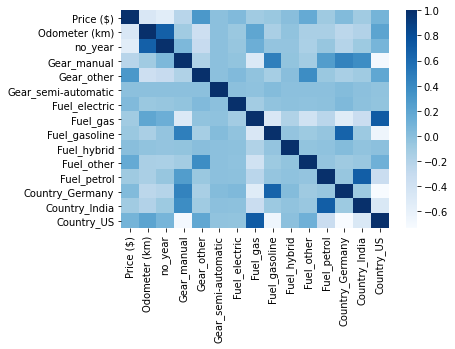

In [45]:
import seaborn as sns
sns.heatmap(f_df.corr(),cmap="Blues")

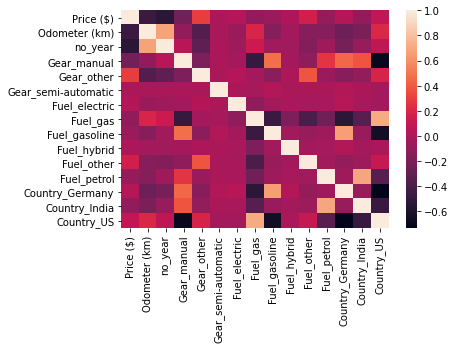

In [46]:
sns.heatmap(f_df.corr())

In [38]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(f_df)

In [37]:
scaled_df[:5]

array([[-0.77461398,  1.40537225,  1.74768878,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-0.95630582,  1.81735248,  1.92857408,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-0.491594  ,  0.5110737 ,  1.38591817,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-1.12751544,  2.78198912,  2.83300061, -0.44994316, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489,  3.25534806, -0.11882219,
        -0.25624712, -0.15462845, -0.34764267, -0.22404054, -2.10102797],
       [-1.11703322,  2.00827015,  3.55654183,  2.22250295, -0.4058618 ,
        -0.01151156, -0.07118887, -1.51947489, 

In [66]:
X=f_df.iloc[:,1:]
y=f_df.iloc[:,0]

In [25]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

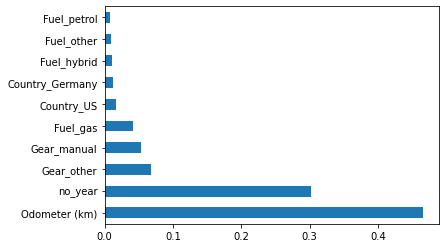

In [26]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##LR

In [68]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
Odometer (km),-3985.363851
no_year,-4967.499483
Gear_manual,-2668.481561
Gear_other,833.413354
Gear_semi-automatic,-112.468254
Fuel_electric,-820.675565
Fuel_gas,-7057.906694
Fuel_gasoline,-1742.430076
Fuel_hybrid,-1675.995205
Fuel_other,-3134.587783


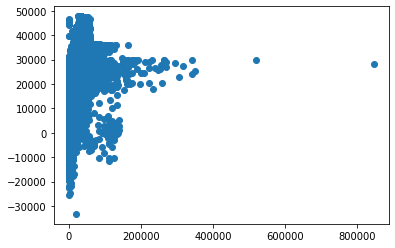

In [71]:
predictions = model.predict(X_test)

plt.scatter(y_test, predictions)

(array([1.21813e+05, 3.78000e+02, 5.80000e+01, 1.20000e+01, 3.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-45397.65916219,  40937.9572376 , 127273.57363738, 213609.19003717,
        299944.80643695, 386280.42283674, 472616.03923652, 558951.65563631,
        645287.27203609, 731622.88843588, 817958.50483567]),
 <a list of 10 Patch objects>)

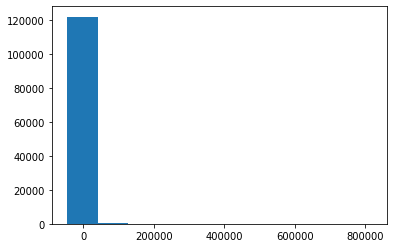

In [72]:
plt.hist(y_test - predictions)

In [73]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 10676.960429607505


In [74]:
from sklearn.metrics import r2_score

r2_score(y_test, predictions)

0.4309807242685698

##RF

In [28]:
#rf = RandomForestRegressor()
rf1 = RandomForestRegressor(random_state=1, n_estimators=700)
rf1.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=700, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [29]:
rf_test_predictions=rf1.predict(X_test)

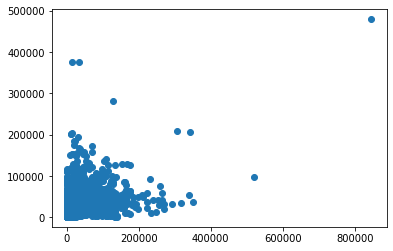

In [30]:
plt.scatter(y_test,rf_test_predictions)

(array([2.00000e+00, 0.00000e+00, 1.40000e+01, 1.49000e+02, 1.21514e+05,
        5.17000e+02, 5.40000e+01, 1.10000e+01, 3.00000e+00, 2.00000e+00]),
 array([-360678.69409122, -282455.85341464, -204233.01273807,
        -126010.17206149,  -47787.33138492,   30435.50929166,
         108658.34996824,  186881.19064481,  265104.03132139,
         343326.87199796,  421549.71267454]),
 <a list of 10 Patch objects>)

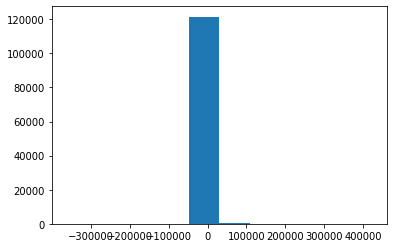

In [31]:
#sns.distplot(y_test-predictions)
plt.hist(y_test-rf_test_predictions)

In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_test_predictions)))

RMSE: 8875.238606528716


In [33]:
rf1.score(X_test,y_test)

0.6068196657366669

In [56]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [57]:
# Create the random grid
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=5, random_state=42, n_jobs = None)

In [63]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.410, total=   7.3s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.438, total=   7.0s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.3s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.441, total=   6.9s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.2s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.466, total=   7.6s
[CV] min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   28.8s remaining:    0.0s


[CV]  min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, score=0.465, total=   6.8s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.427, total=  24.0s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.5s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.458, total=  23.1s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5, score=0.487, total=  23.2s
[CV] min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=5,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [64]:
predictions=rf_random.predict(X_test)

In [78]:
predictions

array([10104.79970158, 14346.80280515,  8492.68912903, ...,
       25574.10185094, 18695.26311742,  5618.03581749])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


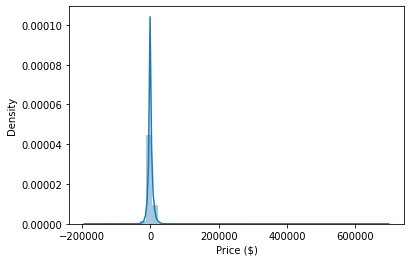

In [65]:
sns.distplot(y_test-predictions)

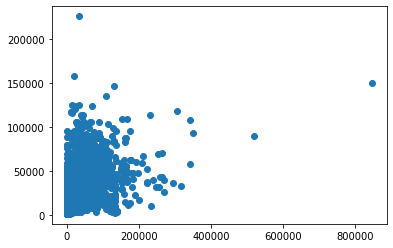

In [66]:
plt.scatter(y_test,predictions)

In [67]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 8695.714931608594


In [68]:
rf_random.score(X_test,y_test)

0.6225648871583509

##GB

In [34]:
gb = GradientBoostingRegressor(random_state=1, n_estimators=500)
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
gb_test_predictions = gb.predict(X_test)

gb_test_rmse = np.sqrt(metrics.mean_squared_error(gb_test_predictions, y_test))
gb_test_rmse

9475.682481691745

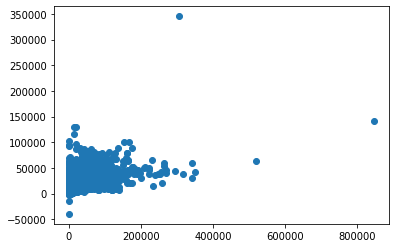

In [36]:
plt.scatter(y_test,gb_test_predictions)

(array([7.10000e+01, 1.21946e+05, 2.13000e+02, 2.30000e+01, 9.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-115565.48965256,  -33624.11864407,   48317.25236442,
         130258.62337291,  212199.9943814 ,  294141.36538989,
         376082.73639838,  458024.10740687,  539965.47841537,
         621906.84942386,  703848.22043235]),
 <a list of 10 Patch objects>)

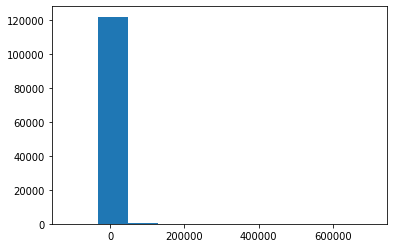

In [37]:
plt.hist(y_test-gb_test_predictions)

In [38]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gb_test_predictions)))

RMSE: 9475.682481691745


In [39]:
gb.score(X_test,y_test)

0.5518197531777991

##Average model of rf and gb

In [40]:
np.sqrt(metrics.mean_squared_error(y_test, (gb_test_predictions + rf_test_predictions)/2))

8500.216102779015

In [41]:
metrics.r2_score(y_test, (gb_test_predictions + rf_test_predictions)/2)

0.6393452584829931